In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
os.getcwd()

'/home/users/t_wand01/Promotion/GLE Estimation/GLE Estimation Weekly'

In [2]:
lag =13#  13 # for local renormalisation

In [3]:
DF = pd.read_csv("CompaniesStocks.csv", index_col=0)

In [4]:
set(DF.columns )

{'AA',
 'AAPL',
 'ABT',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AMAT',
 'AMD',
 'AMGN',
 'AN',
 'AON',
 'APA',
 'APD',
 'APH',
 'AVY',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBY',
 'BDX',
 'BEN',
 'BIG',
 'BIIB',
 'BK',
 'BLL',
 'BMS',
 'BMY',
 'C',
 'CA',
 'CAG',
 'CAH',
 'CAT',
 'CCL',
 'CERN',
 'CI',
 'CINF',
 'CL',
 'CLF',
 'CLX',
 'CMA',
 'CMCSA',
 'CMI',
 'CMS',
 'CNP',
 'COP',
 'COST',
 'CPB',
 'CSCO',
 'CSX',
 'CTAS',
 'CVS',
 'CVX',
 'D',
 'DD',
 'DE',
 'DHR',
 'DIS',
 'DOV',
 'DTE',
 'DUK',
 'DVN',
 'EA',
 'ECL',
 'ED',
 'EFX',
 'EIX',
 'EMR',
 'EOG',
 'EQT',
 'ETN',
 'ETR',
 'EXC',
 'EXPD',
 'F',
 'FAST',
 'FDX',
 'FHN',
 'FISV',
 'FITB',
 'FLS',
 'FMC',
 'GD',
 'GE',
 'GILD',
 'GIS',
 'GLW',
 'GPC',
 'GPS',
 'GT',
 'GWW',
 'HAL',
 'HAS',
 'HBAN',
 'HD',
 'HES',
 'HNZ',
 'HOG',
 'HON',
 'HP',
 'HPQ',
 'HRB',
 'HRL',
 'HST',
 'HSY',
 'HUM',
 'IBM',
 'IFF',
 'IGT',
 'INTC',
 'IP',
 'IPG',
 'ITW',
 'JCI',
 'JNJ',
 'JPM',
 'JWN',
 'K',
 'KEY

In [5]:
# Stepanov averaging over a time window of T = 42 which is moved in one-day steps through the

In [6]:
DFShifted = DF.iloc[0:(DF.shape[0]-1)]
DFShifted.index = DF.index[1:]
DF.diff().iloc[1:].shape,DFShifted.shape

((5290, 249), (5290, 249))

In [7]:
DF.index

Index(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07', '1992-01-08',
       '1992-01-09', '1992-01-10', '1992-01-13', '1992-01-14', '1992-01-15',
       ...
       '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20', '2012-12-21',
       '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31'],
      dtype='object', name='Date', length=5291)

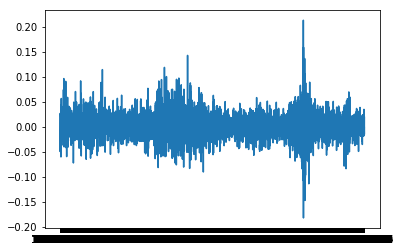

In [8]:
Returns = DF.diff().iloc[1:] / DFShifted
plt.plot(Returns["APA"])

In [9]:
# local renormalisation
#ReturnsRN = (Returns-Returns.rolling(lag).mean())/Returns.rolling(lag).std()
ReturnsRN = Returns

In [10]:
ReturnsRN.head(20)

,APA,CVX,COP,DVN,EOG,XOM,HAL,HP,HES,MRO,...,LLY,MDT,MRK,PKI,PRGO,PFE,SYK,THC,TMO,UNH
Date,,,,,,,,,,,,,,,,,,,,,
1992-01-03,-0.008064,0.009075,0.000000,0.028572,-0.006536,0.002084,-0.024590,-0.012346,0.015424,0.005154,...,0.000000,0.029571,0.015026,0.007752,0.061403,-0.004464,-0.010526,-0.015384,-0.008108,0.076530
1992-01-06,-0.016261,-0.014389,-0.025641,0.000000,-0.019737,-0.008316,-0.058823,-0.006250,0.007595,-0.061539,...,-0.004418,0.014325,-0.009623,-0.005128,0.024793,-0.007474,0.021277,0.070312,0.005449,0.014219
1992-01-07,-0.049586,-0.020073,-0.026316,-0.027778,-0.080537,-0.006290,-0.040179,-0.006289,-0.060301,-0.016393,...,0.010355,-0.028350,-0.002989,0.007732,-0.032258,0.018073,-0.015625,0.014599,-0.005420,-0.009346
1992-01-08,-0.017392,-0.005586,-0.010811,0.000000,-0.007299,-0.012658,-0.009302,0.006329,-0.050802,-0.038889,...,0.017570,-0.023873,0.000000,0.002557,0.000000,-0.004438,-0.005291,-0.021583,0.013624,0.001572
1992-01-09,-0.017698,-0.014981,-0.005464,-0.014285,0.022059,-0.006410,-0.009389,-0.012579,0.019718,0.028902,...,0.002877,-0.016304,-0.001499,0.012756,-0.033334,0.019317,0.069149,-0.058823,-0.002688,0.039247
1992-01-10,-0.009010,0.007605,0.000000,0.000000,0.028777,0.010753,0.023697,0.012739,-0.013812,-0.016854,...,-0.002869,-0.046961,-0.021021,0.012593,0.025862,-0.013119,0.017413,0.039062,-0.016173,0.001511
1992-01-13,0.027273,0.030189,0.021977,-0.028986,0.027972,0.008510,0.027777,0.006290,0.019608,0.000000,...,-0.001439,0.031884,-0.017638,0.026060,0.025211,-0.001477,-0.017115,0.015038,-0.002740,-0.016592
1992-01-14,0.017699,0.009157,0.037634,-0.044776,-0.034013,0.016878,0.013513,0.056250,0.019230,0.022857,...,-0.001441,-0.011236,0.000000,-0.007281,-0.008197,-0.011835,-0.034826,0.029630,0.002747,0.050614
1992-01-15,-0.034782,-0.007259,0.010362,0.031250,0.028169,-0.012448,0.031111,0.011834,0.002696,0.039106,...,-0.023088,-0.005682,-0.024980,0.007335,-0.008264,-0.049400,-0.005155,-0.007194,0.016439,0.033577


In [11]:
T = 5
Corr_List = list()

for i in range(ReturnsRN.shape[0]):
    Window_R = ReturnsRN.iloc[i:(T+i)]  # Window of the returns from day i to T+i
    C = Window_R.corr()
    C_np = C.to_numpy()
    C_mean_nonan = np.mean(C_np[~np.isnan(C_np)])
    print(i,len(Window_R), Window_R.shape, np.shape(C_np))

   # print(i, np.round(C_np.mean(),3), np.round(C_mean_nonan,3),
    #      np.round(np.sum(np.isnan(C_np))/(C_np.shape[0]*C_np.shape[1]),3))



    #if i < 50 and i > 12:
        #print(Window_R)
        #print(C_np)
    Corr_List.append(C_mean_nonan)   # the correlation of this window is saved as ith correlation
    

0 5 (5, 249) (249, 249)
1 5 (5, 249) (249, 249)
2 5 (5, 249) (249, 249)
3 5 (5, 249) (249, 249)
4 5 (5, 249) (249, 249)
5 5 (5, 249) (249, 249)
6 5 (5, 249) (249, 249)
7 5 (5, 249) (249, 249)
8 5 (5, 249) (249, 249)
9 5 (5, 249) (249, 249)
10 5 (5, 249) (249, 249)
11 5 (5, 249) (249, 249)
12 5 (5, 249) (249, 249)
13 5 (5, 249) (249, 249)
14 5 (5, 249) (249, 249)
15 5 (5, 249) (249, 249)
16 5 (5, 249) (249, 249)
17 5 (5, 249) (249, 249)
18 5 (5, 249) (249, 249)
19 5 (5, 249) (249, 249)
20 5 (5, 249) (249, 249)
21 5 (5, 249) (249, 249)
22 5 (5, 249) (249, 249)
23 5 (5, 249) (249, 249)
24 5 (5, 249) (249, 249)
25 5 (5, 249) (249, 249)
26 5 (5, 249) (249, 249)
27 5 (5, 249) (249, 249)
28 5 (5, 249) (249, 249)
29 5 (5, 249) (249, 249)
30 5 (5, 249) (249, 249)
31 5 (5, 249) (249, 249)
32 5 (5, 249) (249, 249)
33 5 (5, 249) (249, 249)
34 5 (5, 249) (249, 249)
35 5 (5, 249) (249, 249)
36 5 (5, 249) (249, 249)
37 5 (5, 249) (249, 249)
38 5 (5, 249) (249, 249)
39 5 (5, 249) (249, 249)
40 5 (5, 2

378 5 (5, 249) (249, 249)
379 5 (5, 249) (249, 249)
380 5 (5, 249) (249, 249)
381 5 (5, 249) (249, 249)
382 5 (5, 249) (249, 249)
383 5 (5, 249) (249, 249)
384 5 (5, 249) (249, 249)
385 5 (5, 249) (249, 249)
386 5 (5, 249) (249, 249)
387 5 (5, 249) (249, 249)
388 5 (5, 249) (249, 249)
389 5 (5, 249) (249, 249)
390 5 (5, 249) (249, 249)
391 5 (5, 249) (249, 249)
392 5 (5, 249) (249, 249)
393 5 (5, 249) (249, 249)
394 5 (5, 249) (249, 249)
395 5 (5, 249) (249, 249)
396 5 (5, 249) (249, 249)
397 5 (5, 249) (249, 249)
398 5 (5, 249) (249, 249)
399 5 (5, 249) (249, 249)
400 5 (5, 249) (249, 249)
401 5 (5, 249) (249, 249)
402 5 (5, 249) (249, 249)
403 5 (5, 249) (249, 249)
404 5 (5, 249) (249, 249)
405 5 (5, 249) (249, 249)
406 5 (5, 249) (249, 249)
407 5 (5, 249) (249, 249)
408 5 (5, 249) (249, 249)
409 5 (5, 249) (249, 249)
410 5 (5, 249) (249, 249)
411 5 (5, 249) (249, 249)
412 5 (5, 249) (249, 249)
413 5 (5, 249) (249, 249)
414 5 (5, 249) (249, 249)
415 5 (5, 249) (249, 249)
416 5 (5, 24

783 5 (5, 249) (249, 249)
784 5 (5, 249) (249, 249)
785 5 (5, 249) (249, 249)
786 5 (5, 249) (249, 249)
787 5 (5, 249) (249, 249)
788 5 (5, 249) (249, 249)
789 5 (5, 249) (249, 249)
790 5 (5, 249) (249, 249)
791 5 (5, 249) (249, 249)
792 5 (5, 249) (249, 249)
793 5 (5, 249) (249, 249)
794 5 (5, 249) (249, 249)
795 5 (5, 249) (249, 249)
796 5 (5, 249) (249, 249)
797 5 (5, 249) (249, 249)
798 5 (5, 249) (249, 249)
799 5 (5, 249) (249, 249)
800 5 (5, 249) (249, 249)
801 5 (5, 249) (249, 249)
802 5 (5, 249) (249, 249)
803 5 (5, 249) (249, 249)
804 5 (5, 249) (249, 249)
805 5 (5, 249) (249, 249)
806 5 (5, 249) (249, 249)
807 5 (5, 249) (249, 249)
808 5 (5, 249) (249, 249)
809 5 (5, 249) (249, 249)
810 5 (5, 249) (249, 249)
811 5 (5, 249) (249, 249)
812 5 (5, 249) (249, 249)
813 5 (5, 249) (249, 249)
814 5 (5, 249) (249, 249)
815 5 (5, 249) (249, 249)
816 5 (5, 249) (249, 249)
817 5 (5, 249) (249, 249)
818 5 (5, 249) (249, 249)
819 5 (5, 249) (249, 249)
820 5 (5, 249) (249, 249)
821 5 (5, 24

1177 5 (5, 249) (249, 249)
1178 5 (5, 249) (249, 249)
1179 5 (5, 249) (249, 249)
1180 5 (5, 249) (249, 249)
1181 5 (5, 249) (249, 249)
1182 5 (5, 249) (249, 249)
1183 5 (5, 249) (249, 249)
1184 5 (5, 249) (249, 249)
1185 5 (5, 249) (249, 249)
1186 5 (5, 249) (249, 249)
1187 5 (5, 249) (249, 249)
1188 5 (5, 249) (249, 249)
1189 5 (5, 249) (249, 249)
1190 5 (5, 249) (249, 249)
1191 5 (5, 249) (249, 249)
1192 5 (5, 249) (249, 249)
1193 5 (5, 249) (249, 249)
1194 5 (5, 249) (249, 249)
1195 5 (5, 249) (249, 249)
1196 5 (5, 249) (249, 249)
1197 5 (5, 249) (249, 249)
1198 5 (5, 249) (249, 249)
1199 5 (5, 249) (249, 249)
1200 5 (5, 249) (249, 249)
1201 5 (5, 249) (249, 249)
1202 5 (5, 249) (249, 249)
1203 5 (5, 249) (249, 249)
1204 5 (5, 249) (249, 249)
1205 5 (5, 249) (249, 249)
1206 5 (5, 249) (249, 249)
1207 5 (5, 249) (249, 249)
1208 5 (5, 249) (249, 249)
1209 5 (5, 249) (249, 249)
1210 5 (5, 249) (249, 249)
1211 5 (5, 249) (249, 249)
1212 5 (5, 249) (249, 249)
1213 5 (5, 249) (249, 249)
1

1571 5 (5, 249) (249, 249)
1572 5 (5, 249) (249, 249)
1573 5 (5, 249) (249, 249)
1574 5 (5, 249) (249, 249)
1575 5 (5, 249) (249, 249)
1576 5 (5, 249) (249, 249)
1577 5 (5, 249) (249, 249)
1578 5 (5, 249) (249, 249)
1579 5 (5, 249) (249, 249)
1580 5 (5, 249) (249, 249)
1581 5 (5, 249) (249, 249)
1582 5 (5, 249) (249, 249)
1583 5 (5, 249) (249, 249)
1584 5 (5, 249) (249, 249)
1585 5 (5, 249) (249, 249)
1586 5 (5, 249) (249, 249)
1587 5 (5, 249) (249, 249)
1588 5 (5, 249) (249, 249)
1589 5 (5, 249) (249, 249)
1590 5 (5, 249) (249, 249)
1591 5 (5, 249) (249, 249)
1592 5 (5, 249) (249, 249)
1593 5 (5, 249) (249, 249)
1594 5 (5, 249) (249, 249)
1595 5 (5, 249) (249, 249)
1596 5 (5, 249) (249, 249)
1597 5 (5, 249) (249, 249)
1598 5 (5, 249) (249, 249)
1599 5 (5, 249) (249, 249)
1600 5 (5, 249) (249, 249)
1601 5 (5, 249) (249, 249)
1602 5 (5, 249) (249, 249)
1603 5 (5, 249) (249, 249)
1604 5 (5, 249) (249, 249)
1605 5 (5, 249) (249, 249)
1606 5 (5, 249) (249, 249)
1607 5 (5, 249) (249, 249)
1

1971 5 (5, 249) (249, 249)
1972 5 (5, 249) (249, 249)
1973 5 (5, 249) (249, 249)
1974 5 (5, 249) (249, 249)
1975 5 (5, 249) (249, 249)
1976 5 (5, 249) (249, 249)
1977 5 (5, 249) (249, 249)
1978 5 (5, 249) (249, 249)
1979 5 (5, 249) (249, 249)
1980 5 (5, 249) (249, 249)
1981 5 (5, 249) (249, 249)
1982 5 (5, 249) (249, 249)
1983 5 (5, 249) (249, 249)
1984 5 (5, 249) (249, 249)
1985 5 (5, 249) (249, 249)
1986 5 (5, 249) (249, 249)
1987 5 (5, 249) (249, 249)
1988 5 (5, 249) (249, 249)
1989 5 (5, 249) (249, 249)
1990 5 (5, 249) (249, 249)
1991 5 (5, 249) (249, 249)
1992 5 (5, 249) (249, 249)
1993 5 (5, 249) (249, 249)
1994 5 (5, 249) (249, 249)
1995 5 (5, 249) (249, 249)
1996 5 (5, 249) (249, 249)
1997 5 (5, 249) (249, 249)
1998 5 (5, 249) (249, 249)
1999 5 (5, 249) (249, 249)
2000 5 (5, 249) (249, 249)
2001 5 (5, 249) (249, 249)
2002 5 (5, 249) (249, 249)
2003 5 (5, 249) (249, 249)
2004 5 (5, 249) (249, 249)
2005 5 (5, 249) (249, 249)
2006 5 (5, 249) (249, 249)
2007 5 (5, 249) (249, 249)
2

2362 5 (5, 249) (249, 249)
2363 5 (5, 249) (249, 249)
2364 5 (5, 249) (249, 249)
2365 5 (5, 249) (249, 249)
2366 5 (5, 249) (249, 249)
2367 5 (5, 249) (249, 249)
2368 5 (5, 249) (249, 249)
2369 5 (5, 249) (249, 249)
2370 5 (5, 249) (249, 249)
2371 5 (5, 249) (249, 249)
2372 5 (5, 249) (249, 249)
2373 5 (5, 249) (249, 249)
2374 5 (5, 249) (249, 249)
2375 5 (5, 249) (249, 249)
2376 5 (5, 249) (249, 249)
2377 5 (5, 249) (249, 249)
2378 5 (5, 249) (249, 249)
2379 5 (5, 249) (249, 249)
2380 5 (5, 249) (249, 249)
2381 5 (5, 249) (249, 249)
2382 5 (5, 249) (249, 249)
2383 5 (5, 249) (249, 249)
2384 5 (5, 249) (249, 249)
2385 5 (5, 249) (249, 249)
2386 5 (5, 249) (249, 249)
2387 5 (5, 249) (249, 249)
2388 5 (5, 249) (249, 249)
2389 5 (5, 249) (249, 249)
2390 5 (5, 249) (249, 249)
2391 5 (5, 249) (249, 249)
2392 5 (5, 249) (249, 249)
2393 5 (5, 249) (249, 249)
2394 5 (5, 249) (249, 249)
2395 5 (5, 249) (249, 249)
2396 5 (5, 249) (249, 249)
2397 5 (5, 249) (249, 249)
2398 5 (5, 249) (249, 249)
2

2758 5 (5, 249) (249, 249)
2759 5 (5, 249) (249, 249)
2760 5 (5, 249) (249, 249)
2761 5 (5, 249) (249, 249)
2762 5 (5, 249) (249, 249)
2763 5 (5, 249) (249, 249)
2764 5 (5, 249) (249, 249)
2765 5 (5, 249) (249, 249)
2766 5 (5, 249) (249, 249)
2767 5 (5, 249) (249, 249)
2768 5 (5, 249) (249, 249)
2769 5 (5, 249) (249, 249)
2770 5 (5, 249) (249, 249)
2771 5 (5, 249) (249, 249)
2772 5 (5, 249) (249, 249)
2773 5 (5, 249) (249, 249)
2774 5 (5, 249) (249, 249)
2775 5 (5, 249) (249, 249)
2776 5 (5, 249) (249, 249)
2777 5 (5, 249) (249, 249)
2778 5 (5, 249) (249, 249)
2779 5 (5, 249) (249, 249)
2780 5 (5, 249) (249, 249)
2781 5 (5, 249) (249, 249)
2782 5 (5, 249) (249, 249)
2783 5 (5, 249) (249, 249)
2784 5 (5, 249) (249, 249)
2785 5 (5, 249) (249, 249)
2786 5 (5, 249) (249, 249)
2787 5 (5, 249) (249, 249)
2788 5 (5, 249) (249, 249)
2789 5 (5, 249) (249, 249)
2790 5 (5, 249) (249, 249)
2791 5 (5, 249) (249, 249)
2792 5 (5, 249) (249, 249)
2793 5 (5, 249) (249, 249)
2794 5 (5, 249) (249, 249)
2

3142 5 (5, 249) (249, 249)
3143 5 (5, 249) (249, 249)
3144 5 (5, 249) (249, 249)
3145 5 (5, 249) (249, 249)
3146 5 (5, 249) (249, 249)
3147 5 (5, 249) (249, 249)
3148 5 (5, 249) (249, 249)
3149 5 (5, 249) (249, 249)
3150 5 (5, 249) (249, 249)
3151 5 (5, 249) (249, 249)
3152 5 (5, 249) (249, 249)
3153 5 (5, 249) (249, 249)
3154 5 (5, 249) (249, 249)
3155 5 (5, 249) (249, 249)
3156 5 (5, 249) (249, 249)
3157 5 (5, 249) (249, 249)
3158 5 (5, 249) (249, 249)
3159 5 (5, 249) (249, 249)
3160 5 (5, 249) (249, 249)
3161 5 (5, 249) (249, 249)
3162 5 (5, 249) (249, 249)
3163 5 (5, 249) (249, 249)
3164 5 (5, 249) (249, 249)
3165 5 (5, 249) (249, 249)
3166 5 (5, 249) (249, 249)
3167 5 (5, 249) (249, 249)
3168 5 (5, 249) (249, 249)
3169 5 (5, 249) (249, 249)
3170 5 (5, 249) (249, 249)
3171 5 (5, 249) (249, 249)
3172 5 (5, 249) (249, 249)
3173 5 (5, 249) (249, 249)
3174 5 (5, 249) (249, 249)
3175 5 (5, 249) (249, 249)
3176 5 (5, 249) (249, 249)
3177 5 (5, 249) (249, 249)
3178 5 (5, 249) (249, 249)
3

3526 5 (5, 249) (249, 249)
3527 5 (5, 249) (249, 249)
3528 5 (5, 249) (249, 249)
3529 5 (5, 249) (249, 249)
3530 5 (5, 249) (249, 249)
3531 5 (5, 249) (249, 249)
3532 5 (5, 249) (249, 249)
3533 5 (5, 249) (249, 249)
3534 5 (5, 249) (249, 249)
3535 5 (5, 249) (249, 249)
3536 5 (5, 249) (249, 249)
3537 5 (5, 249) (249, 249)
3538 5 (5, 249) (249, 249)
3539 5 (5, 249) (249, 249)
3540 5 (5, 249) (249, 249)
3541 5 (5, 249) (249, 249)
3542 5 (5, 249) (249, 249)
3543 5 (5, 249) (249, 249)
3544 5 (5, 249) (249, 249)
3545 5 (5, 249) (249, 249)
3546 5 (5, 249) (249, 249)
3547 5 (5, 249) (249, 249)
3548 5 (5, 249) (249, 249)
3549 5 (5, 249) (249, 249)
3550 5 (5, 249) (249, 249)
3551 5 (5, 249) (249, 249)
3552 5 (5, 249) (249, 249)
3553 5 (5, 249) (249, 249)
3554 5 (5, 249) (249, 249)
3555 5 (5, 249) (249, 249)
3556 5 (5, 249) (249, 249)
3557 5 (5, 249) (249, 249)
3558 5 (5, 249) (249, 249)
3559 5 (5, 249) (249, 249)
3560 5 (5, 249) (249, 249)
3561 5 (5, 249) (249, 249)
3562 5 (5, 249) (249, 249)
3

3921 5 (5, 249) (249, 249)
3922 5 (5, 249) (249, 249)
3923 5 (5, 249) (249, 249)
3924 5 (5, 249) (249, 249)
3925 5 (5, 249) (249, 249)
3926 5 (5, 249) (249, 249)
3927 5 (5, 249) (249, 249)
3928 5 (5, 249) (249, 249)
3929 5 (5, 249) (249, 249)
3930 5 (5, 249) (249, 249)
3931 5 (5, 249) (249, 249)
3932 5 (5, 249) (249, 249)
3933 5 (5, 249) (249, 249)
3934 5 (5, 249) (249, 249)
3935 5 (5, 249) (249, 249)
3936 5 (5, 249) (249, 249)
3937 5 (5, 249) (249, 249)
3938 5 (5, 249) (249, 249)
3939 5 (5, 249) (249, 249)
3940 5 (5, 249) (249, 249)
3941 5 (5, 249) (249, 249)
3942 5 (5, 249) (249, 249)
3943 5 (5, 249) (249, 249)
3944 5 (5, 249) (249, 249)
3945 5 (5, 249) (249, 249)
3946 5 (5, 249) (249, 249)
3947 5 (5, 249) (249, 249)
3948 5 (5, 249) (249, 249)
3949 5 (5, 249) (249, 249)
3950 5 (5, 249) (249, 249)
3951 5 (5, 249) (249, 249)
3952 5 (5, 249) (249, 249)
3953 5 (5, 249) (249, 249)
3954 5 (5, 249) (249, 249)
3955 5 (5, 249) (249, 249)
3956 5 (5, 249) (249, 249)
3957 5 (5, 249) (249, 249)
3

4317 5 (5, 249) (249, 249)
4318 5 (5, 249) (249, 249)
4319 5 (5, 249) (249, 249)
4320 5 (5, 249) (249, 249)
4321 5 (5, 249) (249, 249)
4322 5 (5, 249) (249, 249)
4323 5 (5, 249) (249, 249)
4324 5 (5, 249) (249, 249)
4325 5 (5, 249) (249, 249)
4326 5 (5, 249) (249, 249)
4327 5 (5, 249) (249, 249)
4328 5 (5, 249) (249, 249)
4329 5 (5, 249) (249, 249)
4330 5 (5, 249) (249, 249)
4331 5 (5, 249) (249, 249)
4332 5 (5, 249) (249, 249)
4333 5 (5, 249) (249, 249)
4334 5 (5, 249) (249, 249)
4335 5 (5, 249) (249, 249)
4336 5 (5, 249) (249, 249)
4337 5 (5, 249) (249, 249)
4338 5 (5, 249) (249, 249)
4339 5 (5, 249) (249, 249)
4340 5 (5, 249) (249, 249)
4341 5 (5, 249) (249, 249)
4342 5 (5, 249) (249, 249)
4343 5 (5, 249) (249, 249)
4344 5 (5, 249) (249, 249)
4345 5 (5, 249) (249, 249)
4346 5 (5, 249) (249, 249)
4347 5 (5, 249) (249, 249)
4348 5 (5, 249) (249, 249)
4349 5 (5, 249) (249, 249)
4350 5 (5, 249) (249, 249)
4351 5 (5, 249) (249, 249)
4352 5 (5, 249) (249, 249)
4353 5 (5, 249) (249, 249)
4

4711 5 (5, 249) (249, 249)
4712 5 (5, 249) (249, 249)
4713 5 (5, 249) (249, 249)
4714 5 (5, 249) (249, 249)
4715 5 (5, 249) (249, 249)
4716 5 (5, 249) (249, 249)
4717 5 (5, 249) (249, 249)
4718 5 (5, 249) (249, 249)
4719 5 (5, 249) (249, 249)
4720 5 (5, 249) (249, 249)
4721 5 (5, 249) (249, 249)
4722 5 (5, 249) (249, 249)
4723 5 (5, 249) (249, 249)
4724 5 (5, 249) (249, 249)
4725 5 (5, 249) (249, 249)
4726 5 (5, 249) (249, 249)
4727 5 (5, 249) (249, 249)
4728 5 (5, 249) (249, 249)
4729 5 (5, 249) (249, 249)
4730 5 (5, 249) (249, 249)
4731 5 (5, 249) (249, 249)
4732 5 (5, 249) (249, 249)
4733 5 (5, 249) (249, 249)
4734 5 (5, 249) (249, 249)
4735 5 (5, 249) (249, 249)
4736 5 (5, 249) (249, 249)
4737 5 (5, 249) (249, 249)
4738 5 (5, 249) (249, 249)
4739 5 (5, 249) (249, 249)
4740 5 (5, 249) (249, 249)
4741 5 (5, 249) (249, 249)
4742 5 (5, 249) (249, 249)
4743 5 (5, 249) (249, 249)
4744 5 (5, 249) (249, 249)
4745 5 (5, 249) (249, 249)
4746 5 (5, 249) (249, 249)
4747 5 (5, 249) (249, 249)
4

5114 5 (5, 249) (249, 249)
5115 5 (5, 249) (249, 249)
5116 5 (5, 249) (249, 249)
5117 5 (5, 249) (249, 249)
5118 5 (5, 249) (249, 249)
5119 5 (5, 249) (249, 249)
5120 5 (5, 249) (249, 249)
5121 5 (5, 249) (249, 249)
5122 5 (5, 249) (249, 249)
5123 5 (5, 249) (249, 249)
5124 5 (5, 249) (249, 249)
5125 5 (5, 249) (249, 249)
5126 5 (5, 249) (249, 249)
5127 5 (5, 249) (249, 249)
5128 5 (5, 249) (249, 249)
5129 5 (5, 249) (249, 249)
5130 5 (5, 249) (249, 249)
5131 5 (5, 249) (249, 249)
5132 5 (5, 249) (249, 249)
5133 5 (5, 249) (249, 249)
5134 5 (5, 249) (249, 249)
5135 5 (5, 249) (249, 249)
5136 5 (5, 249) (249, 249)
5137 5 (5, 249) (249, 249)
5138 5 (5, 249) (249, 249)
5139 5 (5, 249) (249, 249)
5140 5 (5, 249) (249, 249)
5141 5 (5, 249) (249, 249)
5142 5 (5, 249) (249, 249)
5143 5 (5, 249) (249, 249)
5144 5 (5, 249) (249, 249)
5145 5 (5, 249) (249, 249)
5146 5 (5, 249) (249, 249)
5147 5 (5, 249) (249, 249)
5148 5 (5, 249) (249, 249)
5149 5 (5, 249) (249, 249)
5150 5 (5, 249) (249, 249)
5

/home/users/t_wand01/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/t_wand01/.local/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
np.shape(C_np)

(249, 249)

In [13]:
Window_R

,APA,CVX,COP,DVN,EOG,XOM,HAL,HP,HES,MRO,...,LLY,MDT,MRK,PKI,PRGO,PFE,SYK,THC,TMO,UNH
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,0.018819,0.015876,0.01612,0.0174,0.018379,0.017039,0.019994,0.026576,0.032762,0.028514,...,0.014815,0.006626,0.007382,0.022881,0.01711,0.007633,0.006795,0.036387,0.013829,0.007055


In [14]:
len(Corr_List)

5290

In [15]:
Window_R

,APA,CVX,COP,DVN,EOG,XOM,HAL,HP,HES,MRO,...,LLY,MDT,MRK,PKI,PRGO,PFE,SYK,THC,TMO,UNH
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,0.018819,0.015876,0.01612,0.0174,0.018379,0.017039,0.019994,0.026576,0.032762,0.028514,...,0.014815,0.006626,0.007382,0.022881,0.01711,0.007633,0.006795,0.036387,0.013829,0.007055


In [16]:
Correlation1D = pd.DataFrame(data={"Correlation": Corr_List},
                             index = pd.to_datetime(DF.index[1:],format="%Y-%m-%d"))

#### Some 1000-point-windows

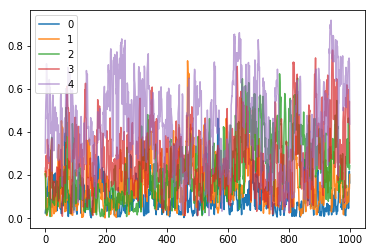

In [17]:
for i in range(0,5):
    
    window = np.array(Corr_List[1000*i:(1000*i+1000)])
    plt.plot(window, alpha = 1.0-0.1*i, label=i)
    np.save("1000erWindow_number_"+str(i)+".npy", window)
    
    
plt.legend()
plt.show()

In [18]:
IndexFifth = [x for x in range(4,len(Corr_List)-5,5)]     # here: x+2 for x in .... for centre of interval!!!
IndexFifth_Center = [x+2 for x in range(4,len(Corr_List)-5,5)] 


Corr_array_Fifth = np.array(Corr_List)[IndexFifth] # - 5 to avoid end-of-interval-problems
print(Corr_array_Fifth)
FifthDay = Correlation1D.index[IndexFifth]   # only every fith correlation, but still saved as "beginning of window"
print(len(Corr_array_Fifth))


FifthDay_Center = Correlation1D.index[IndexFifth_Center]
print(len(FifthDay_Center))

#np.save("MarketCorrWeekly.npy"  ,Corr_array_Fifth)

[0.11584862 0.16145639 0.06570435 ... 0.19025801 0.46583138 0.30569798]
1057
1057


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


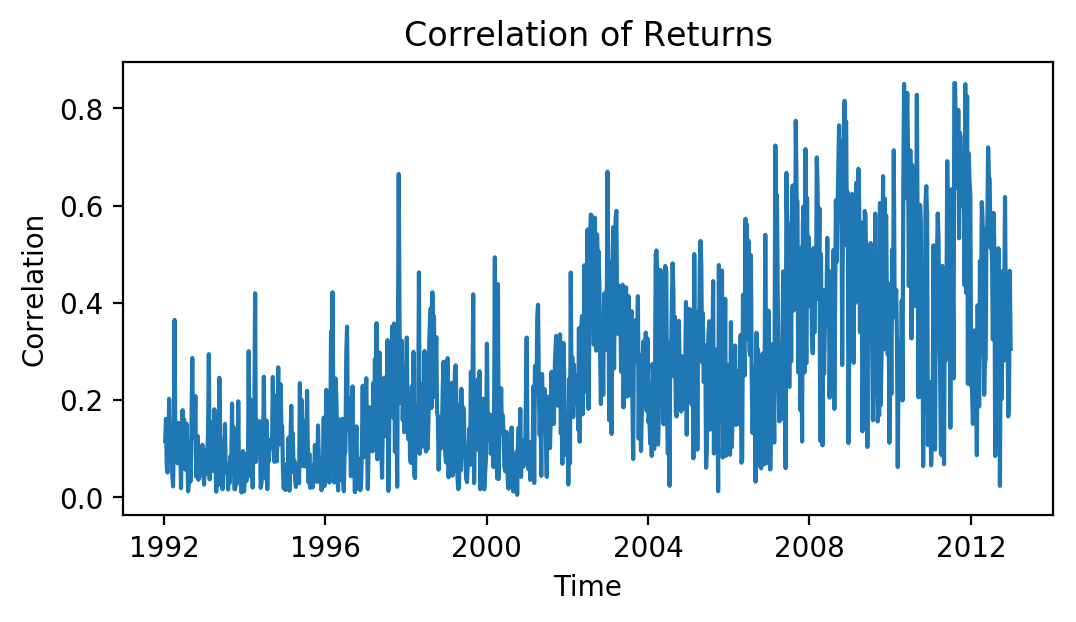

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(6,3), dpi=200)
#plt.plot(Correlation1D.index,
#         Correlation1D["Correlation"])
plt.plot(FifthDay_Center, Corr_array_Fifth)
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.title("Correlation of Returns")
plt.savefig("1D_Correlation_Fifth.pdf",bbox_inches="tight")
plt.show()

#### Standard Deviation of the Market Correlation

In [20]:
Correlation1D

,Correlation
Date,
1992-01-03,0.025021
1992-01-06,0.039853
1992-01-07,0.037676
1992-01-08,0.120284
1992-01-09,0.115849
...,...
2012-12-24,0.779866
2012-12-26,0.834159
2012-12-27,0.919958


In [21]:
from statsmodels.tsa.stattools import acf

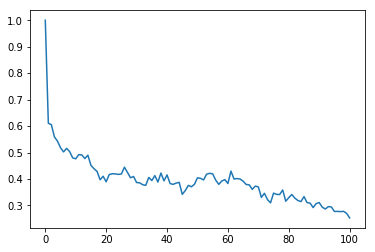

In [22]:
plt.plot(acf(Corr_array_Fifth, nlags = 100))

In [23]:
T = 42
Corr_List42 = list()
Index_Center42 = list()



for i in range(ReturnsRN.shape[0]-int(T/2)):
    Window_R = ReturnsRN.iloc[i:(T+i)]  # window from i to i+42
    C = Window_R.corr()
    C_np = C.to_numpy()
    C_mean_nonan_42 = np.mean(C_np[~np.isnan(C_np)])
   # print(i, np.round(C_np.mean(),3), np.round(C_mean_nonan,3),
    #      np.round(np.sum(np.isnan(C_np))/(C_np.shape[0]*C_np.shape[1]),3))



    #if i < 50 and i > 12:
        #print(Window_R)
        #print(C_np)
    Corr_List42.append(C_mean_nonan_42)   # correlation of this window is appended as the ith correlation
    print(Window_R.index[20] ,i,len(Window_R), Window_R.shape, np.shape(C_np))
    Index_Center42 += [ i+20 ]
    
Dates_Center42 = Correlation1D.index[Index_Center42]

1992-01-31 0 42 (42, 249) (249, 249)
1992-02-03 1 42 (42, 249) (249, 249)
1992-02-04 2 42 (42, 249) (249, 249)
1992-02-05 3 42 (42, 249) (249, 249)
1992-02-06 4 42 (42, 249) (249, 249)
1992-02-07 5 42 (42, 249) (249, 249)
1992-02-10 6 42 (42, 249) (249, 249)
1992-02-11 7 42 (42, 249) (249, 249)
1992-02-12 8 42 (42, 249) (249, 249)
1992-02-13 9 42 (42, 249) (249, 249)
1992-02-14 10 42 (42, 249) (249, 249)
1992-02-18 11 42 (42, 249) (249, 249)
1992-02-19 12 42 (42, 249) (249, 249)
1992-02-20 13 42 (42, 249) (249, 249)
1992-02-21 14 42 (42, 249) (249, 249)
1992-02-24 15 42 (42, 249) (249, 249)
1992-02-25 16 42 (42, 249) (249, 249)
1992-02-26 17 42 (42, 249) (249, 249)
1992-02-27 18 42 (42, 249) (249, 249)
1992-02-28 19 42 (42, 249) (249, 249)
1992-03-02 20 42 (42, 249) (249, 249)
1992-03-03 21 42 (42, 249) (249, 249)
1992-03-04 22 42 (42, 249) (249, 249)
1992-03-05 23 42 (42, 249) (249, 249)
1992-03-06 24 42 (42, 249) (249, 249)
1992-03-09 25 42 (42, 249) (249, 249)
1992-03-10 26 42 (42, 

1992-12-10 218 42 (42, 249) (249, 249)
1992-12-11 219 42 (42, 249) (249, 249)
1992-12-14 220 42 (42, 249) (249, 249)
1992-12-15 221 42 (42, 249) (249, 249)
1992-12-16 222 42 (42, 249) (249, 249)
1992-12-17 223 42 (42, 249) (249, 249)
1992-12-18 224 42 (42, 249) (249, 249)
1992-12-21 225 42 (42, 249) (249, 249)
1992-12-22 226 42 (42, 249) (249, 249)
1992-12-23 227 42 (42, 249) (249, 249)
1992-12-24 228 42 (42, 249) (249, 249)
1992-12-28 229 42 (42, 249) (249, 249)
1992-12-29 230 42 (42, 249) (249, 249)
1992-12-30 231 42 (42, 249) (249, 249)
1992-12-31 232 42 (42, 249) (249, 249)
1993-01-04 233 42 (42, 249) (249, 249)
1993-01-05 234 42 (42, 249) (249, 249)
1993-01-06 235 42 (42, 249) (249, 249)
1993-01-07 236 42 (42, 249) (249, 249)
1993-01-08 237 42 (42, 249) (249, 249)
1993-01-11 238 42 (42, 249) (249, 249)
1993-01-12 239 42 (42, 249) (249, 249)
1993-01-13 240 42 (42, 249) (249, 249)
1993-01-14 241 42 (42, 249) (249, 249)
1993-01-15 242 42 (42, 249) (249, 249)
1993-01-18 243 42 (42, 24

1993-11-04 446 42 (42, 249) (249, 249)
1993-11-05 447 42 (42, 249) (249, 249)
1993-11-08 448 42 (42, 249) (249, 249)
1993-11-09 449 42 (42, 249) (249, 249)
1993-11-10 450 42 (42, 249) (249, 249)
1993-11-11 451 42 (42, 249) (249, 249)
1993-11-12 452 42 (42, 249) (249, 249)
1993-11-15 453 42 (42, 249) (249, 249)
1993-11-16 454 42 (42, 249) (249, 249)
1993-11-17 455 42 (42, 249) (249, 249)
1993-11-18 456 42 (42, 249) (249, 249)
1993-11-19 457 42 (42, 249) (249, 249)
1993-11-22 458 42 (42, 249) (249, 249)
1993-11-23 459 42 (42, 249) (249, 249)
1993-11-24 460 42 (42, 249) (249, 249)
1993-11-26 461 42 (42, 249) (249, 249)
1993-11-29 462 42 (42, 249) (249, 249)
1993-11-30 463 42 (42, 249) (249, 249)
1993-12-01 464 42 (42, 249) (249, 249)
1993-12-02 465 42 (42, 249) (249, 249)
1993-12-03 466 42 (42, 249) (249, 249)
1993-12-06 467 42 (42, 249) (249, 249)
1993-12-07 468 42 (42, 249) (249, 249)
1993-12-08 469 42 (42, 249) (249, 249)
1993-12-09 470 42 (42, 249) (249, 249)
1993-12-10 471 42 (42, 24

1994-09-13 661 42 (42, 249) (249, 249)
1994-09-14 662 42 (42, 249) (249, 249)
1994-09-15 663 42 (42, 249) (249, 249)
1994-09-16 664 42 (42, 249) (249, 249)
1994-09-19 665 42 (42, 249) (249, 249)
1994-09-20 666 42 (42, 249) (249, 249)
1994-09-21 667 42 (42, 249) (249, 249)
1994-09-22 668 42 (42, 249) (249, 249)
1994-09-23 669 42 (42, 249) (249, 249)
1994-09-26 670 42 (42, 249) (249, 249)
1994-09-27 671 42 (42, 249) (249, 249)
1994-09-28 672 42 (42, 249) (249, 249)
1994-09-29 673 42 (42, 249) (249, 249)
1994-09-30 674 42 (42, 249) (249, 249)
1994-10-03 675 42 (42, 249) (249, 249)
1994-10-04 676 42 (42, 249) (249, 249)
1994-10-05 677 42 (42, 249) (249, 249)
1994-10-06 678 42 (42, 249) (249, 249)
1994-10-07 679 42 (42, 249) (249, 249)
1994-10-10 680 42 (42, 249) (249, 249)
1994-10-11 681 42 (42, 249) (249, 249)
1994-10-12 682 42 (42, 249) (249, 249)
1994-10-13 683 42 (42, 249) (249, 249)
1994-10-14 684 42 (42, 249) (249, 249)
1994-10-17 685 42 (42, 249) (249, 249)
1994-10-18 686 42 (42, 24

1995-07-20 876 42 (42, 249) (249, 249)
1995-07-21 877 42 (42, 249) (249, 249)
1995-07-24 878 42 (42, 249) (249, 249)
1995-07-25 879 42 (42, 249) (249, 249)
1995-07-26 880 42 (42, 249) (249, 249)
1995-07-27 881 42 (42, 249) (249, 249)
1995-07-28 882 42 (42, 249) (249, 249)
1995-07-31 883 42 (42, 249) (249, 249)
1995-08-01 884 42 (42, 249) (249, 249)
1995-08-02 885 42 (42, 249) (249, 249)
1995-08-03 886 42 (42, 249) (249, 249)
1995-08-04 887 42 (42, 249) (249, 249)
1995-08-07 888 42 (42, 249) (249, 249)
1995-08-08 889 42 (42, 249) (249, 249)
1995-08-09 890 42 (42, 249) (249, 249)
1995-08-10 891 42 (42, 249) (249, 249)
1995-08-11 892 42 (42, 249) (249, 249)
1995-08-14 893 42 (42, 249) (249, 249)
1995-08-15 894 42 (42, 249) (249, 249)
1995-08-16 895 42 (42, 249) (249, 249)
1995-08-17 896 42 (42, 249) (249, 249)
1995-08-18 897 42 (42, 249) (249, 249)
1995-08-21 898 42 (42, 249) (249, 249)
1995-08-22 899 42 (42, 249) (249, 249)
1995-08-23 900 42 (42, 249) (249, 249)
1995-08-24 901 42 (42, 24

1996-06-03 1096 42 (42, 249) (249, 249)
1996-06-04 1097 42 (42, 249) (249, 249)
1996-06-05 1098 42 (42, 249) (249, 249)
1996-06-06 1099 42 (42, 249) (249, 249)
1996-06-07 1100 42 (42, 249) (249, 249)
1996-06-10 1101 42 (42, 249) (249, 249)
1996-06-11 1102 42 (42, 249) (249, 249)
1996-06-12 1103 42 (42, 249) (249, 249)
1996-06-13 1104 42 (42, 249) (249, 249)
1996-06-14 1105 42 (42, 249) (249, 249)
1996-06-17 1106 42 (42, 249) (249, 249)
1996-06-18 1107 42 (42, 249) (249, 249)
1996-06-19 1108 42 (42, 249) (249, 249)
1996-06-20 1109 42 (42, 249) (249, 249)
1996-06-21 1110 42 (42, 249) (249, 249)
1996-06-24 1111 42 (42, 249) (249, 249)
1996-06-25 1112 42 (42, 249) (249, 249)
1996-06-26 1113 42 (42, 249) (249, 249)
1996-06-27 1114 42 (42, 249) (249, 249)
1996-06-28 1115 42 (42, 249) (249, 249)
1996-07-01 1116 42 (42, 249) (249, 249)
1996-07-02 1117 42 (42, 249) (249, 249)
1996-07-03 1118 42 (42, 249) (249, 249)
1996-07-05 1119 42 (42, 249) (249, 249)
1996-07-08 1120 42 (42, 249) (249, 249)


1997-04-18 1318 42 (42, 249) (249, 249)
1997-04-21 1319 42 (42, 249) (249, 249)
1997-04-22 1320 42 (42, 249) (249, 249)
1997-04-23 1321 42 (42, 249) (249, 249)
1997-04-24 1322 42 (42, 249) (249, 249)
1997-04-25 1323 42 (42, 249) (249, 249)
1997-04-28 1324 42 (42, 249) (249, 249)
1997-04-29 1325 42 (42, 249) (249, 249)
1997-04-30 1326 42 (42, 249) (249, 249)
1997-05-01 1327 42 (42, 249) (249, 249)
1997-05-02 1328 42 (42, 249) (249, 249)
1997-05-05 1329 42 (42, 249) (249, 249)
1997-05-06 1330 42 (42, 249) (249, 249)
1997-05-07 1331 42 (42, 249) (249, 249)
1997-05-08 1332 42 (42, 249) (249, 249)
1997-05-09 1333 42 (42, 249) (249, 249)
1997-05-12 1334 42 (42, 249) (249, 249)
1997-05-13 1335 42 (42, 249) (249, 249)
1997-05-14 1336 42 (42, 249) (249, 249)
1997-05-15 1337 42 (42, 249) (249, 249)
1997-05-16 1338 42 (42, 249) (249, 249)
1997-05-19 1339 42 (42, 249) (249, 249)
1997-05-20 1340 42 (42, 249) (249, 249)
1997-05-21 1341 42 (42, 249) (249, 249)
1997-05-22 1342 42 (42, 249) (249, 249)


1998-03-04 1538 42 (42, 249) (249, 249)
1998-03-05 1539 42 (42, 249) (249, 249)
1998-03-06 1540 42 (42, 249) (249, 249)
1998-03-09 1541 42 (42, 249) (249, 249)
1998-03-10 1542 42 (42, 249) (249, 249)
1998-03-11 1543 42 (42, 249) (249, 249)
1998-03-12 1544 42 (42, 249) (249, 249)
1998-03-13 1545 42 (42, 249) (249, 249)
1998-03-16 1546 42 (42, 249) (249, 249)
1998-03-17 1547 42 (42, 249) (249, 249)
1998-03-18 1548 42 (42, 249) (249, 249)
1998-03-19 1549 42 (42, 249) (249, 249)
1998-03-20 1550 42 (42, 249) (249, 249)
1998-03-23 1551 42 (42, 249) (249, 249)
1998-03-24 1552 42 (42, 249) (249, 249)
1998-03-25 1553 42 (42, 249) (249, 249)
1998-03-26 1554 42 (42, 249) (249, 249)
1998-03-27 1555 42 (42, 249) (249, 249)
1998-03-30 1556 42 (42, 249) (249, 249)
1998-03-31 1557 42 (42, 249) (249, 249)
1998-04-01 1558 42 (42, 249) (249, 249)
1998-04-02 1559 42 (42, 249) (249, 249)
1998-04-03 1560 42 (42, 249) (249, 249)
1998-04-06 1561 42 (42, 249) (249, 249)
1998-04-07 1562 42 (42, 249) (249, 249)


1999-01-14 1757 42 (42, 249) (249, 249)
1999-01-15 1758 42 (42, 249) (249, 249)
1999-01-19 1759 42 (42, 249) (249, 249)
1999-01-20 1760 42 (42, 249) (249, 249)
1999-01-21 1761 42 (42, 249) (249, 249)
1999-01-22 1762 42 (42, 249) (249, 249)
1999-01-25 1763 42 (42, 249) (249, 249)
1999-01-26 1764 42 (42, 249) (249, 249)
1999-01-27 1765 42 (42, 249) (249, 249)
1999-01-28 1766 42 (42, 249) (249, 249)
1999-01-29 1767 42 (42, 249) (249, 249)
1999-02-01 1768 42 (42, 249) (249, 249)
1999-02-02 1769 42 (42, 249) (249, 249)
1999-02-03 1770 42 (42, 249) (249, 249)
1999-02-04 1771 42 (42, 249) (249, 249)
1999-02-05 1772 42 (42, 249) (249, 249)
1999-02-08 1773 42 (42, 249) (249, 249)
1999-02-09 1774 42 (42, 249) (249, 249)
1999-02-10 1775 42 (42, 249) (249, 249)
1999-02-11 1776 42 (42, 249) (249, 249)
1999-02-12 1777 42 (42, 249) (249, 249)
1999-02-16 1778 42 (42, 249) (249, 249)
1999-02-17 1779 42 (42, 249) (249, 249)
1999-02-18 1780 42 (42, 249) (249, 249)
1999-02-19 1781 42 (42, 249) (249, 249)


1999-11-23 1974 42 (42, 249) (249, 249)
1999-11-24 1975 42 (42, 249) (249, 249)
1999-11-26 1976 42 (42, 249) (249, 249)
1999-11-29 1977 42 (42, 249) (249, 249)
1999-11-30 1978 42 (42, 249) (249, 249)
1999-12-01 1979 42 (42, 249) (249, 249)
1999-12-02 1980 42 (42, 249) (249, 249)
1999-12-03 1981 42 (42, 249) (249, 249)
1999-12-06 1982 42 (42, 249) (249, 249)
1999-12-07 1983 42 (42, 249) (249, 249)
1999-12-08 1984 42 (42, 249) (249, 249)
1999-12-09 1985 42 (42, 249) (249, 249)
1999-12-10 1986 42 (42, 249) (249, 249)
1999-12-13 1987 42 (42, 249) (249, 249)
1999-12-14 1988 42 (42, 249) (249, 249)
1999-12-15 1989 42 (42, 249) (249, 249)
1999-12-16 1990 42 (42, 249) (249, 249)
1999-12-17 1991 42 (42, 249) (249, 249)
1999-12-20 1992 42 (42, 249) (249, 249)
1999-12-21 1993 42 (42, 249) (249, 249)
1999-12-22 1994 42 (42, 249) (249, 249)
1999-12-23 1995 42 (42, 249) (249, 249)
1999-12-27 1996 42 (42, 249) (249, 249)
1999-12-28 1997 42 (42, 249) (249, 249)
1999-12-29 1998 42 (42, 249) (249, 249)


2000-10-04 2192 42 (42, 249) (249, 249)
2000-10-05 2193 42 (42, 249) (249, 249)
2000-10-06 2194 42 (42, 249) (249, 249)
2000-10-09 2195 42 (42, 249) (249, 249)
2000-10-10 2196 42 (42, 249) (249, 249)
2000-10-11 2197 42 (42, 249) (249, 249)
2000-10-12 2198 42 (42, 249) (249, 249)
2000-10-13 2199 42 (42, 249) (249, 249)
2000-10-16 2200 42 (42, 249) (249, 249)
2000-10-17 2201 42 (42, 249) (249, 249)
2000-10-18 2202 42 (42, 249) (249, 249)
2000-10-19 2203 42 (42, 249) (249, 249)
2000-10-20 2204 42 (42, 249) (249, 249)
2000-10-23 2205 42 (42, 249) (249, 249)
2000-10-24 2206 42 (42, 249) (249, 249)
2000-10-25 2207 42 (42, 249) (249, 249)
2000-10-26 2208 42 (42, 249) (249, 249)
2000-10-27 2209 42 (42, 249) (249, 249)
2000-10-30 2210 42 (42, 249) (249, 249)
2000-10-31 2211 42 (42, 249) (249, 249)
2000-11-01 2212 42 (42, 249) (249, 249)
2000-11-02 2213 42 (42, 249) (249, 249)
2000-11-03 2214 42 (42, 249) (249, 249)
2000-11-06 2215 42 (42, 249) (249, 249)
2000-11-07 2216 42 (42, 249) (249, 249)


2001-08-20 2412 42 (42, 249) (249, 249)
2001-08-21 2413 42 (42, 249) (249, 249)
2001-08-22 2414 42 (42, 249) (249, 249)
2001-08-23 2415 42 (42, 249) (249, 249)
2001-08-24 2416 42 (42, 249) (249, 249)
2001-08-27 2417 42 (42, 249) (249, 249)
2001-08-28 2418 42 (42, 249) (249, 249)
2001-08-29 2419 42 (42, 249) (249, 249)
2001-08-30 2420 42 (42, 249) (249, 249)
2001-08-31 2421 42 (42, 249) (249, 249)
2001-09-04 2422 42 (42, 249) (249, 249)
2001-09-05 2423 42 (42, 249) (249, 249)
2001-09-06 2424 42 (42, 249) (249, 249)
2001-09-07 2425 42 (42, 249) (249, 249)
2001-09-10 2426 42 (42, 249) (249, 249)
2001-09-17 2427 42 (42, 249) (249, 249)
2001-09-18 2428 42 (42, 249) (249, 249)
2001-09-19 2429 42 (42, 249) (249, 249)
2001-09-20 2430 42 (42, 249) (249, 249)
2001-09-21 2431 42 (42, 249) (249, 249)
2001-09-24 2432 42 (42, 249) (249, 249)
2001-09-25 2433 42 (42, 249) (249, 249)
2001-09-26 2434 42 (42, 249) (249, 249)
2001-09-27 2435 42 (42, 249) (249, 249)
2001-09-28 2436 42 (42, 249) (249, 249)


2002-07-10 2631 42 (42, 249) (249, 249)
2002-07-11 2632 42 (42, 249) (249, 249)
2002-07-12 2633 42 (42, 249) (249, 249)
2002-07-15 2634 42 (42, 249) (249, 249)
2002-07-16 2635 42 (42, 249) (249, 249)
2002-07-17 2636 42 (42, 249) (249, 249)
2002-07-18 2637 42 (42, 249) (249, 249)
2002-07-19 2638 42 (42, 249) (249, 249)
2002-07-22 2639 42 (42, 249) (249, 249)
2002-07-23 2640 42 (42, 249) (249, 249)
2002-07-24 2641 42 (42, 249) (249, 249)
2002-07-25 2642 42 (42, 249) (249, 249)
2002-07-26 2643 42 (42, 249) (249, 249)
2002-07-29 2644 42 (42, 249) (249, 249)
2002-07-30 2645 42 (42, 249) (249, 249)
2002-07-31 2646 42 (42, 249) (249, 249)
2002-08-01 2647 42 (42, 249) (249, 249)
2002-08-02 2648 42 (42, 249) (249, 249)
2002-08-05 2649 42 (42, 249) (249, 249)
2002-08-06 2650 42 (42, 249) (249, 249)
2002-08-07 2651 42 (42, 249) (249, 249)
2002-08-08 2652 42 (42, 249) (249, 249)
2002-08-09 2653 42 (42, 249) (249, 249)
2002-08-12 2654 42 (42, 249) (249, 249)
2002-08-13 2655 42 (42, 249) (249, 249)


2003-07-01 2877 42 (42, 249) (249, 249)
2003-07-02 2878 42 (42, 249) (249, 249)
2003-07-03 2879 42 (42, 249) (249, 249)
2003-07-07 2880 42 (42, 249) (249, 249)
2003-07-08 2881 42 (42, 249) (249, 249)
2003-07-09 2882 42 (42, 249) (249, 249)
2003-07-10 2883 42 (42, 249) (249, 249)
2003-07-11 2884 42 (42, 249) (249, 249)
2003-07-14 2885 42 (42, 249) (249, 249)
2003-07-15 2886 42 (42, 249) (249, 249)
2003-07-16 2887 42 (42, 249) (249, 249)
2003-07-17 2888 42 (42, 249) (249, 249)
2003-07-18 2889 42 (42, 249) (249, 249)
2003-07-21 2890 42 (42, 249) (249, 249)
2003-07-22 2891 42 (42, 249) (249, 249)
2003-07-23 2892 42 (42, 249) (249, 249)
2003-07-24 2893 42 (42, 249) (249, 249)
2003-07-25 2894 42 (42, 249) (249, 249)
2003-07-28 2895 42 (42, 249) (249, 249)
2003-07-29 2896 42 (42, 249) (249, 249)
2003-07-30 2897 42 (42, 249) (249, 249)
2003-07-31 2898 42 (42, 249) (249, 249)
2003-08-01 2899 42 (42, 249) (249, 249)
2003-08-04 2900 42 (42, 249) (249, 249)
2003-08-05 2901 42 (42, 249) (249, 249)


2004-05-03 3088 42 (42, 249) (249, 249)
2004-05-04 3089 42 (42, 249) (249, 249)
2004-05-05 3090 42 (42, 249) (249, 249)
2004-05-06 3091 42 (42, 249) (249, 249)
2004-05-07 3092 42 (42, 249) (249, 249)
2004-05-10 3093 42 (42, 249) (249, 249)
2004-05-11 3094 42 (42, 249) (249, 249)
2004-05-12 3095 42 (42, 249) (249, 249)
2004-05-13 3096 42 (42, 249) (249, 249)
2004-05-14 3097 42 (42, 249) (249, 249)
2004-05-17 3098 42 (42, 249) (249, 249)
2004-05-18 3099 42 (42, 249) (249, 249)
2004-05-19 3100 42 (42, 249) (249, 249)
2004-05-20 3101 42 (42, 249) (249, 249)
2004-05-21 3102 42 (42, 249) (249, 249)
2004-05-24 3103 42 (42, 249) (249, 249)
2004-05-25 3104 42 (42, 249) (249, 249)
2004-05-26 3105 42 (42, 249) (249, 249)
2004-05-27 3106 42 (42, 249) (249, 249)
2004-05-28 3107 42 (42, 249) (249, 249)
2004-06-01 3108 42 (42, 249) (249, 249)
2004-06-02 3109 42 (42, 249) (249, 249)
2004-06-03 3110 42 (42, 249) (249, 249)
2004-06-04 3111 42 (42, 249) (249, 249)
2004-06-07 3112 42 (42, 249) (249, 249)


2005-03-21 3310 42 (42, 249) (249, 249)
2005-03-22 3311 42 (42, 249) (249, 249)
2005-03-23 3312 42 (42, 249) (249, 249)
2005-03-24 3313 42 (42, 249) (249, 249)
2005-03-28 3314 42 (42, 249) (249, 249)
2005-03-29 3315 42 (42, 249) (249, 249)
2005-03-30 3316 42 (42, 249) (249, 249)
2005-03-31 3317 42 (42, 249) (249, 249)
2005-04-01 3318 42 (42, 249) (249, 249)
2005-04-04 3319 42 (42, 249) (249, 249)
2005-04-05 3320 42 (42, 249) (249, 249)
2005-04-06 3321 42 (42, 249) (249, 249)
2005-04-07 3322 42 (42, 249) (249, 249)
2005-04-08 3323 42 (42, 249) (249, 249)
2005-04-11 3324 42 (42, 249) (249, 249)
2005-04-12 3325 42 (42, 249) (249, 249)
2005-04-13 3326 42 (42, 249) (249, 249)
2005-04-14 3327 42 (42, 249) (249, 249)
2005-04-15 3328 42 (42, 249) (249, 249)
2005-04-18 3329 42 (42, 249) (249, 249)
2005-04-19 3330 42 (42, 249) (249, 249)
2005-04-20 3331 42 (42, 249) (249, 249)
2005-04-21 3332 42 (42, 249) (249, 249)
2005-04-22 3333 42 (42, 249) (249, 249)
2005-04-25 3334 42 (42, 249) (249, 249)


2006-02-02 3530 42 (42, 249) (249, 249)
2006-02-03 3531 42 (42, 249) (249, 249)
2006-02-06 3532 42 (42, 249) (249, 249)
2006-02-07 3533 42 (42, 249) (249, 249)
2006-02-08 3534 42 (42, 249) (249, 249)
2006-02-09 3535 42 (42, 249) (249, 249)
2006-02-10 3536 42 (42, 249) (249, 249)
2006-02-13 3537 42 (42, 249) (249, 249)
2006-02-14 3538 42 (42, 249) (249, 249)
2006-02-15 3539 42 (42, 249) (249, 249)
2006-02-16 3540 42 (42, 249) (249, 249)
2006-02-17 3541 42 (42, 249) (249, 249)
2006-02-21 3542 42 (42, 249) (249, 249)
2006-02-22 3543 42 (42, 249) (249, 249)
2006-02-23 3544 42 (42, 249) (249, 249)
2006-02-24 3545 42 (42, 249) (249, 249)
2006-02-27 3546 42 (42, 249) (249, 249)
2006-02-28 3547 42 (42, 249) (249, 249)
2006-03-01 3548 42 (42, 249) (249, 249)
2006-03-02 3549 42 (42, 249) (249, 249)
2006-03-03 3550 42 (42, 249) (249, 249)
2006-03-06 3551 42 (42, 249) (249, 249)
2006-03-07 3552 42 (42, 249) (249, 249)
2006-03-08 3553 42 (42, 249) (249, 249)
2006-03-09 3554 42 (42, 249) (249, 249)


2007-01-19 3771 42 (42, 249) (249, 249)
2007-01-22 3772 42 (42, 249) (249, 249)
2007-01-23 3773 42 (42, 249) (249, 249)
2007-01-24 3774 42 (42, 249) (249, 249)
2007-01-25 3775 42 (42, 249) (249, 249)
2007-01-26 3776 42 (42, 249) (249, 249)
2007-01-29 3777 42 (42, 249) (249, 249)
2007-01-30 3778 42 (42, 249) (249, 249)
2007-01-31 3779 42 (42, 249) (249, 249)
2007-02-01 3780 42 (42, 249) (249, 249)
2007-02-02 3781 42 (42, 249) (249, 249)
2007-02-05 3782 42 (42, 249) (249, 249)
2007-02-06 3783 42 (42, 249) (249, 249)
2007-02-07 3784 42 (42, 249) (249, 249)
2007-02-08 3785 42 (42, 249) (249, 249)
2007-02-09 3786 42 (42, 249) (249, 249)
2007-02-12 3787 42 (42, 249) (249, 249)
2007-02-13 3788 42 (42, 249) (249, 249)
2007-02-14 3789 42 (42, 249) (249, 249)
2007-02-15 3790 42 (42, 249) (249, 249)
2007-02-16 3791 42 (42, 249) (249, 249)
2007-02-20 3792 42 (42, 249) (249, 249)
2007-02-21 3793 42 (42, 249) (249, 249)
2007-02-22 3794 42 (42, 249) (249, 249)
2007-02-23 3795 42 (42, 249) (249, 249)


2007-12-26 4007 42 (42, 249) (249, 249)
2007-12-27 4008 42 (42, 249) (249, 249)
2007-12-28 4009 42 (42, 249) (249, 249)
2007-12-31 4010 42 (42, 249) (249, 249)
2008-01-02 4011 42 (42, 249) (249, 249)
2008-01-03 4012 42 (42, 249) (249, 249)
2008-01-04 4013 42 (42, 249) (249, 249)
2008-01-07 4014 42 (42, 249) (249, 249)
2008-01-08 4015 42 (42, 249) (249, 249)
2008-01-09 4016 42 (42, 249) (249, 249)
2008-01-10 4017 42 (42, 249) (249, 249)
2008-01-11 4018 42 (42, 249) (249, 249)
2008-01-14 4019 42 (42, 249) (249, 249)
2008-01-15 4020 42 (42, 249) (249, 249)
2008-01-16 4021 42 (42, 249) (249, 249)
2008-01-17 4022 42 (42, 249) (249, 249)
2008-01-18 4023 42 (42, 249) (249, 249)
2008-01-22 4024 42 (42, 249) (249, 249)
2008-01-23 4025 42 (42, 249) (249, 249)
2008-01-24 4026 42 (42, 249) (249, 249)
2008-01-25 4027 42 (42, 249) (249, 249)
2008-01-28 4028 42 (42, 249) (249, 249)
2008-01-29 4029 42 (42, 249) (249, 249)
2008-01-30 4030 42 (42, 249) (249, 249)
2008-01-31 4031 42 (42, 249) (249, 249)


2008-10-30 4221 42 (42, 249) (249, 249)
2008-10-31 4222 42 (42, 249) (249, 249)
2008-11-03 4223 42 (42, 249) (249, 249)
2008-11-04 4224 42 (42, 249) (249, 249)
2008-11-05 4225 42 (42, 249) (249, 249)
2008-11-06 4226 42 (42, 249) (249, 249)
2008-11-07 4227 42 (42, 249) (249, 249)
2008-11-10 4228 42 (42, 249) (249, 249)
2008-11-11 4229 42 (42, 249) (249, 249)
2008-11-12 4230 42 (42, 249) (249, 249)
2008-11-13 4231 42 (42, 249) (249, 249)
2008-11-14 4232 42 (42, 249) (249, 249)
2008-11-17 4233 42 (42, 249) (249, 249)
2008-11-18 4234 42 (42, 249) (249, 249)
2008-11-19 4235 42 (42, 249) (249, 249)
2008-11-20 4236 42 (42, 249) (249, 249)
2008-11-21 4237 42 (42, 249) (249, 249)
2008-11-24 4238 42 (42, 249) (249, 249)
2008-11-25 4239 42 (42, 249) (249, 249)
2008-11-26 4240 42 (42, 249) (249, 249)
2008-11-28 4241 42 (42, 249) (249, 249)
2008-12-01 4242 42 (42, 249) (249, 249)
2008-12-02 4243 42 (42, 249) (249, 249)
2008-12-03 4244 42 (42, 249) (249, 249)
2008-12-04 4245 42 (42, 249) (249, 249)


2009-08-31 4430 42 (42, 249) (249, 249)
2009-09-01 4431 42 (42, 249) (249, 249)
2009-09-02 4432 42 (42, 249) (249, 249)
2009-09-03 4433 42 (42, 249) (249, 249)
2009-09-04 4434 42 (42, 249) (249, 249)
2009-09-08 4435 42 (42, 249) (249, 249)
2009-09-09 4436 42 (42, 249) (249, 249)
2009-09-10 4437 42 (42, 249) (249, 249)
2009-09-11 4438 42 (42, 249) (249, 249)
2009-09-14 4439 42 (42, 249) (249, 249)
2009-09-15 4440 42 (42, 249) (249, 249)
2009-09-16 4441 42 (42, 249) (249, 249)
2009-09-17 4442 42 (42, 249) (249, 249)
2009-09-18 4443 42 (42, 249) (249, 249)
2009-09-21 4444 42 (42, 249) (249, 249)
2009-09-22 4445 42 (42, 249) (249, 249)
2009-09-23 4446 42 (42, 249) (249, 249)
2009-09-24 4447 42 (42, 249) (249, 249)
2009-09-25 4448 42 (42, 249) (249, 249)
2009-09-28 4449 42 (42, 249) (249, 249)
2009-09-29 4450 42 (42, 249) (249, 249)
2009-09-30 4451 42 (42, 249) (249, 249)
2009-10-01 4452 42 (42, 249) (249, 249)
2009-10-02 4453 42 (42, 249) (249, 249)
2009-10-05 4454 42 (42, 249) (249, 249)


2010-07-01 4640 42 (42, 249) (249, 249)
2010-07-02 4641 42 (42, 249) (249, 249)
2010-07-06 4642 42 (42, 249) (249, 249)
2010-07-07 4643 42 (42, 249) (249, 249)
2010-07-08 4644 42 (42, 249) (249, 249)
2010-07-09 4645 42 (42, 249) (249, 249)
2010-07-12 4646 42 (42, 249) (249, 249)
2010-07-13 4647 42 (42, 249) (249, 249)
2010-07-14 4648 42 (42, 249) (249, 249)
2010-07-15 4649 42 (42, 249) (249, 249)
2010-07-16 4650 42 (42, 249) (249, 249)
2010-07-19 4651 42 (42, 249) (249, 249)
2010-07-20 4652 42 (42, 249) (249, 249)
2010-07-21 4653 42 (42, 249) (249, 249)
2010-07-22 4654 42 (42, 249) (249, 249)
2010-07-23 4655 42 (42, 249) (249, 249)
2010-07-26 4656 42 (42, 249) (249, 249)
2010-07-27 4657 42 (42, 249) (249, 249)
2010-07-28 4658 42 (42, 249) (249, 249)
2010-07-29 4659 42 (42, 249) (249, 249)
2010-07-30 4660 42 (42, 249) (249, 249)
2010-08-02 4661 42 (42, 249) (249, 249)
2010-08-03 4662 42 (42, 249) (249, 249)
2010-08-04 4663 42 (42, 249) (249, 249)
2010-08-05 4664 42 (42, 249) (249, 249)


2011-05-02 4850 42 (42, 249) (249, 249)
2011-05-03 4851 42 (42, 249) (249, 249)
2011-05-04 4852 42 (42, 249) (249, 249)
2011-05-05 4853 42 (42, 249) (249, 249)
2011-05-06 4854 42 (42, 249) (249, 249)
2011-05-09 4855 42 (42, 249) (249, 249)
2011-05-10 4856 42 (42, 249) (249, 249)
2011-05-11 4857 42 (42, 249) (249, 249)
2011-05-12 4858 42 (42, 249) (249, 249)
2011-05-13 4859 42 (42, 249) (249, 249)
2011-05-16 4860 42 (42, 249) (249, 249)
2011-05-17 4861 42 (42, 249) (249, 249)
2011-05-18 4862 42 (42, 249) (249, 249)
2011-05-19 4863 42 (42, 249) (249, 249)
2011-05-20 4864 42 (42, 249) (249, 249)
2011-05-23 4865 42 (42, 249) (249, 249)
2011-05-24 4866 42 (42, 249) (249, 249)
2011-05-25 4867 42 (42, 249) (249, 249)
2011-05-26 4868 42 (42, 249) (249, 249)
2011-05-27 4869 42 (42, 249) (249, 249)
2011-05-31 4870 42 (42, 249) (249, 249)
2011-06-01 4871 42 (42, 249) (249, 249)
2011-06-02 4872 42 (42, 249) (249, 249)
2011-06-03 4873 42 (42, 249) (249, 249)
2011-06-06 4874 42 (42, 249) (249, 249)


2012-03-07 5064 42 (42, 249) (249, 249)
2012-03-08 5065 42 (42, 249) (249, 249)
2012-03-09 5066 42 (42, 249) (249, 249)
2012-03-12 5067 42 (42, 249) (249, 249)
2012-03-13 5068 42 (42, 249) (249, 249)
2012-03-14 5069 42 (42, 249) (249, 249)
2012-03-15 5070 42 (42, 249) (249, 249)
2012-03-16 5071 42 (42, 249) (249, 249)
2012-03-19 5072 42 (42, 249) (249, 249)
2012-03-20 5073 42 (42, 249) (249, 249)
2012-03-21 5074 42 (42, 249) (249, 249)
2012-03-22 5075 42 (42, 249) (249, 249)
2012-03-23 5076 42 (42, 249) (249, 249)
2012-03-26 5077 42 (42, 249) (249, 249)
2012-03-27 5078 42 (42, 249) (249, 249)
2012-03-28 5079 42 (42, 249) (249, 249)
2012-03-29 5080 42 (42, 249) (249, 249)
2012-03-30 5081 42 (42, 249) (249, 249)
2012-04-02 5082 42 (42, 249) (249, 249)
2012-04-03 5083 42 (42, 249) (249, 249)
2012-04-04 5084 42 (42, 249) (249, 249)
2012-04-05 5085 42 (42, 249) (249, 249)
2012-04-09 5086 42 (42, 249) (249, 249)
2012-04-10 5087 42 (42, 249) (249, 249)
2012-04-11 5088 42 (42, 249) (249, 249)


In [24]:
len(Corr_List42)

5269

In [25]:
Dates_Center42, FifthDay_Center

(DatetimeIndex(['1992-01-31', '1992-02-03', '1992-02-04', '1992-02-05',
                '1992-02-06', '1992-02-07', '1992-02-10', '1992-02-11',
                '1992-02-12', '1992-02-13',
                ...
                '2012-12-14', '2012-12-17', '2012-12-18', '2012-12-19',
                '2012-12-20', '2012-12-21', '2012-12-24', '2012-12-26',
                '2012-12-27', '2012-12-28'],
               dtype='datetime64[ns]', name='Date', length=5269, freq=None),
 DatetimeIndex(['1992-01-13', '1992-01-20', '1992-01-27', '1992-02-03',
                '1992-02-10', '1992-02-18', '1992-02-25', '1992-03-03',
                '1992-03-10', '1992-03-17',
                ...
                '2012-10-18', '2012-10-25', '2012-11-05', '2012-11-12',
                '2012-11-19', '2012-11-27', '2012-12-04', '2012-12-11',
                '2012-12-18', '2012-12-26'],
               dtype='datetime64[ns]', name='Date', length=1057, freq=None))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a n

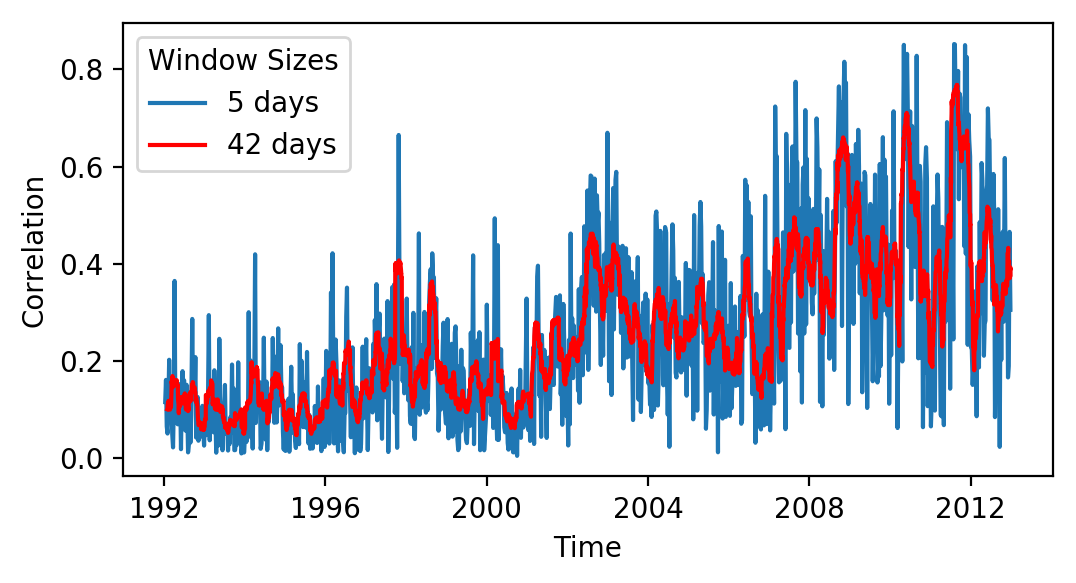

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(6,3), dpi=200)
#plt.plot(Correlation1D.index,
#         Correlation1D["Correlation"])
#plt.plot(Correlation1D.index[:-15],Corr_List[:-15], label="5 days")
plt.plot(FifthDay_Center, Corr_array_Fifth, label="5 days")

plt.plot(Dates_Center42, Corr_List42, c="red", label="42 days")
plt.xlabel("Time")
plt.ylabel("Correlation")
#plt.title("Correlation of Returns")
plt.legend(title="Window Sizes")
plt.savefig("1D_Correlation_Fifth_Comparison_Centered_Dates.pdf",bbox_inches="tight", dpi = 300)
plt.show()

## Export of this Data



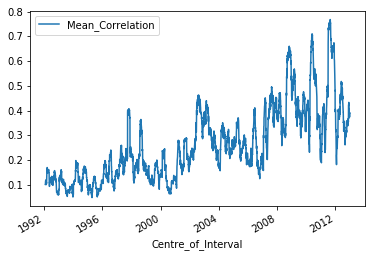

In [27]:
DF_Export_Martin = pd.DataFrame(data = {"Centre_of_Interval": Dates_Center42,
                                        "Mean_Correlation":Corr_List42 })

DF_Export_Martin.plot(x = "Centre_of_Interval", y = "Mean_Correlation")

DF_Export_Martin.to_csv("Financial_Time_Series_Centered_Interval.csv")

In [28]:
DF_CP_read = pd.read_csv("ChangePoint_Dates.csv")
DF_CP_read["Changepoints"] = pd.to_datetime(DF_CP_read["Changepoints"],infer_datetime_format=True)

In [29]:
DF_CP_read["Changepoints"] 

0   1994-06-02
1   1996-08-14
2   1999-06-07
3   2001-10-03
4   2005-04-18
Name: Changepoints, dtype: datetime64[ns]

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

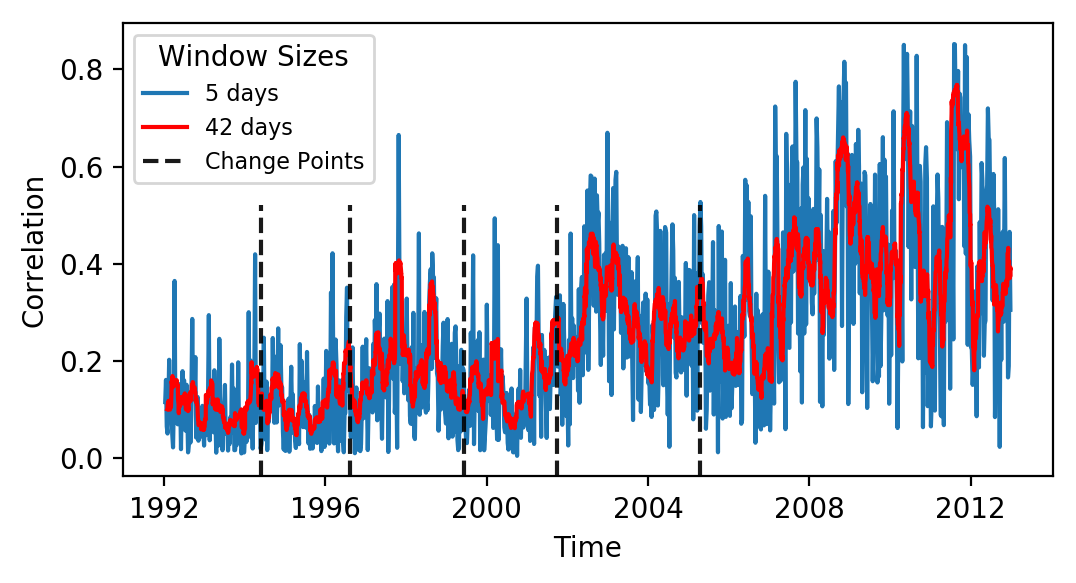

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(6,3), dpi=200)
#plt.plot(Correlation1D.index,
#         Correlation1D["Correlation"])
#plt.plot(Correlation1D.index[:-15],Corr_List[:-15], label="5 days")
plt.plot(FifthDay_Center, Corr_array_Fifth, label="5 days")

plt.plot(Dates_Center42, Corr_List42, c="red", label="42 days")

Label ="Change Points"
for day in DF_CP_read["Changepoints"]:
    plt.axvline(day, ymax=0.6, ls="--",c="k", label=Label, alpha = 0.9)
    Label = None
plt.xlabel("Time")
plt.ylabel("Correlation")
#plt.title("Correlation of Returns")
plt.legend(title="Window Sizes", fontsize = 8)
plt.savefig("1D_Correlation_Fifth_Comparison_with_CP.pdf",bbox_inches="tight", dpi = 300)
plt.show()

In [31]:
Corr_array_Fifth

array([0.11584862, 0.16145639, 0.06570435, ..., 0.19025801, 0.46583138,
       0.30569798])

In [32]:
np.save("WeeklyCorr.npy",Corr_array_Fifth)

In [37]:
List_of_Companies = pd.DataFrame(data = {"Ticker":list(set(DF.columns))})
List_of_Companies.head()

,Ticker
0,APH
1,AVY
2,CINF
3,XOM
4,AA


In [38]:
List_of_Companies.to_csv('Companies_Tickers.txt', sep=' ', index=False)